## Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [3]:
# Split features/target
X_train = train.drop('Score', axis=1)
y_train = train['Score']
X_test  = test.drop('Score', axis=1)
y_test  = test['Score']

In [4]:
import joblib
preprocessor = joblib.load("preprocessor_unfitted.joblib")

In [5]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed  = preprocessor.transform(X_test)

In [6]:
#  Instantiate & fit
lr = LinearRegression()
lr.fit(X_train_transformed, y_train)

#  Predict
y_pred = lr.predict(X_test_transformed)

# Evaluate
print("LinearRegression performance:")
print(f"  MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"  MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"   R²: {r2_score(y_test,   y_pred):.4f}")


LinearRegression performance:
  MSE: 0.2279
  MAE: 0.4597
   R²: 0.0320


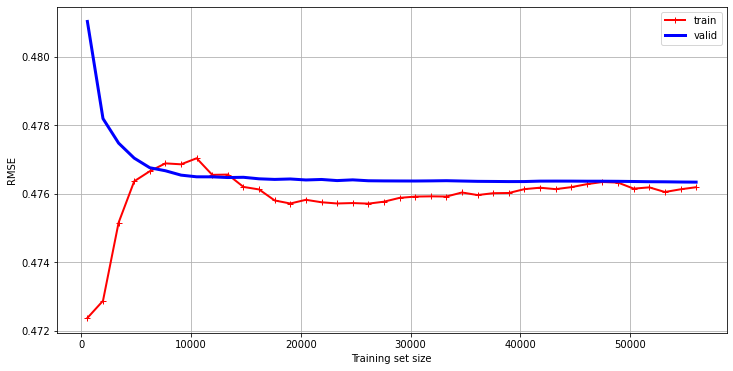

In [7]:
# Plot the learning curve for the simple linear model
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(lr,
                                                         X_train_transformed, y_train,
                                                         train_sizes = np.linspace(0.01, 1.0, 40),
                                                         cv = 5,
                                                         scoring = "neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

fig = plt.figure(figsize = (12, 6))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.show()